WeatherPy
----

Observations by me (Angel):
--Correlation is strong for latitude and higher temperatures; in other words, the closer to the equator the warmer it is. Correlation calculated from the random cities generated for these two variables was 0.75, which is strong, so the initial assumption is supported.
--Correlation between latitude vs humidity, cloudiness, and wind speed is weak to basically non existent.
--The highest wind speeds noted were high in latitude, which just said that a few of the cities far from the equator (soth) were the windiest--even despite the low overall correlation we can say that some of cities experience higher winds the further they are from the equator.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key
city_info =[]

print ("Start Time : %s" % time.ctime())
print("Start Download")
print ("\n")

# create counters --> by this point I know I will be downloading cities/records in "tranches" ""(or sets)""
city_count = 1
tranch_count = 1

#Download and loop cities
for x, city in enumerate(cities):
    
    #tranches of X=50 cities
    if (x % 50 == 0 and x >= 50):
        tranch_count += 1
        city_count = 0
                
    #URL
    city_url = url + "&q=" + city
    print("Downloading city %s of tranch %s, %s" % (city_count, tranch_count, city))
    
    # add to city_count
    city_count += 1
    
    #API Request--
    try:
        api_res_city_weather = requests.get(city_url).json()
        
        #what we want from api--https://openweathermap.org/history
        
        city_lat = api_res_city_weather["coord"]["lat"]
        city_lng = api_res_city_weather["coord"]["lon"]
        city_max_temp = api_res_city_weather["main"]["temp_max"]
        city_hum = api_res_city_weather["main"]["humidity"]
        city_wind = api_res_city_weather["wind"]["speed"]
        city_cloud = api_res_city_weather["clouds"]["all"]
        city_country = api_res_city_weather["sys"]["country"]
        city_date = api_res_city_weather["dt"]
        
        #populate city_info
        city_info.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_hum,
                          "Clouds": city_cloud,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
     
    #city not found
    except:
        print("Error 404, next city...")
        print("\n------------")
        pass


# End of Download

print("---------------------")
print("End of Download Data")
print("---------------------")



Start Time : Thu Feb 27 11:41:23 2020
Start Download


Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------


Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------


Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------


Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
Error 404, next city...

------------
---------------------
End of Download Data
---------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather_pd = pd.DataFrame(city_info)

max_temps = city_weather_pd["Max Temp"]
humidity = city_weather_pd["Humidity"]
cloudiness = city_weather_pd["Clouds"]
wind_speed = city_weather_pd["Wind Speed"]
lat = city_weather_pd["Lat"]
lng = city_weather_pd["Lng"]


city_weather_pd.to_csv(output_data_file)
city_weather_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,cape town,-33.93,18.42,71.01,56,20,27.51,ZA,1582821248
1,tuktoyaktuk,69.45,-133.04,-34.60,73,40,9.17,CA,1582821481
2,albany,42.60,-73.97,37.00,64,90,13.87,US,1582821474
3,colesberg,-30.72,25.10,66.72,61,78,20.33,ZA,1582821681
4,yemelyanovo,56.17,92.68,10.40,72,100,6.71,RU,1582821681


In [5]:
newframe = city_weather_pd[["City","Humidity","Lat", "Lng"]]
newframe
#this is a slice --> .copy at the end would create a brand new dataframe (copy)
#or loc and iloc -->

,City,Humidity,Lat,Lng
0,cape town,56,-33.93,18.42
1,tuktoyaktuk,73,69.45,-133.04
2,albany,64,42.60,-73.97
3,colesberg,61,-30.72,25.10
4,yemelyanovo,72,56.17,92.68
...,...,...,...,...
539,kansanshi,93,-12.10,26.43
540,pitimbu,62,-7.47,-34.81
541,tavira,63,37.13,-7.65
542,kemijarvi,93,66.71,27.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

,Lat,Max Temp,Lng
Lat,1.000000,-0.759994,-0.071032
Max Temp,-0.759994,1.000000,-0.057328
Lng,-0.071032,-0.057328,1.000000


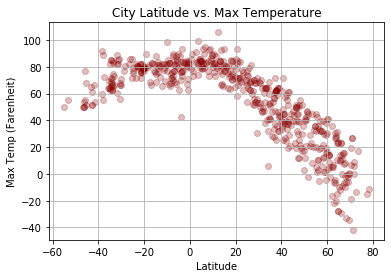

In [12]:
plt.scatter(lat,
           max_temps, alpha=0.25, color='darkred', edgecolor='darkred')

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temp (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Lat vs. Max Temp.png")

Lat_Lng_vs_Temp = city_weather_pd[["Lat","Max Temp","Lng"]]
Lat_Lng_vs_Temp.corr(method="pearson")


#### Latitude vs. Humidity Plot

,Lat,Humidity,Lng
Lat,1.000000,0.087527,-0.071032
Humidity,0.087527,1.000000,0.232531
Lng,-0.071032,0.232531,1.000000


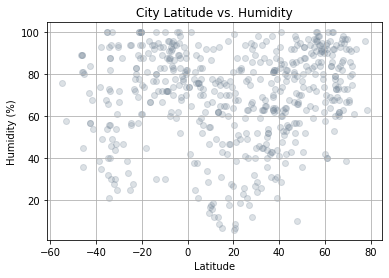

In [13]:
plt.scatter(lat,
           humidity, alpha=0.25, color='lightslategrey', edgecolor='lightslategrey')

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Lat vs. Humidity.png")

Lat_Lng_vs_Hum = city_weather_pd[["Lat","Humidity","Lng"]]
Lat_Lng_vs_Hum.corr(method="pearson")

#### Latitude vs. Cloudiness Plot

,Lat,Clouds,Lng
Lat,1.000000,0.087143,-0.071032
Clouds,0.087143,1.000000,0.158480
Lng,-0.071032,0.158480,1.000000


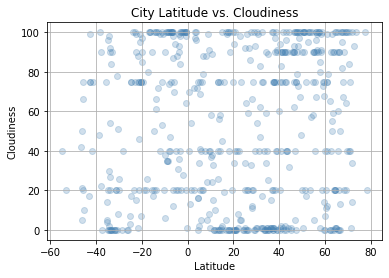

In [16]:
plt.scatter(lat,
           cloudiness, alpha=0.25, color='steelblue', edgecolor='steelblue')

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Lat vs. Cloudiness.png")

Lat_Lng_vs_Cloud = city_weather_pd[["Lat","Clouds","Lng"]]
Lat_Lng_vs_Cloud.corr(method="pearson")

#### Latitude vs. Wind Speed Plot

,Lat,Lng,Wind Speed
Lat,1.000000,-0.071032,0.059235
Lng,-0.071032,1.000000,-0.174254
Wind Speed,0.059235,-0.174254,1.000000


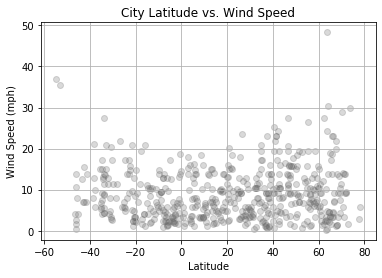

In [17]:
plt.scatter(lat,
           wind_speed, alpha=0.25, color='dimgrey', edgecolor='dimgrey')

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Lat vs. WindSpeed.png")

Lat_Lng_vs_WindS = city_weather_pd[["Lat","Lng","Wind Speed"]]
Lat_Lng_vs_WindS.corr(method="pearson")

In [10]:
# plt.scatter(lng,
#            wind_speed, alpha=0.25, color='navy', edgecolor='navy')

# plt.title("City Longitude vs. Wind Speed")
# plt.ylabel("Wind Speed (mph)")
# plt.xlabel("Longitude")
# plt.grid(True)

# plt.savefig("output_data/Lat vs. WindSpeed.png")

# Lat_Lng_vs_WindS = city_weather_pd[["Lat","Lng","Wind Speed"]]
# Lat_Lng_vs_WindS.corr(method="pearson")